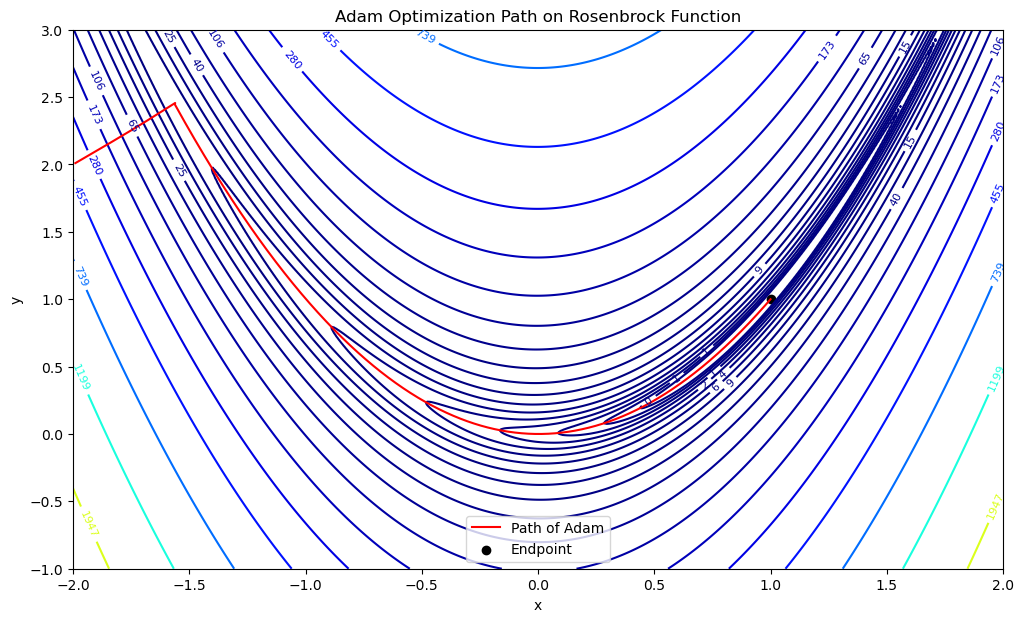

Initial position: ( -2 , 2 )
Optimized position: ( 0.9999997986589236 , 0.9999995968001762 )
Minimum value of f(x, y): 4.0565031556447396e-14


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function and its gradient
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b*(y - x**2)**2

def der_rosenbrock(x, y, a=1, b=100):
    dx = -2*(a - x) - 4*b*x*(y - x**2)
    dy = 2*b*(y - x**2)
    return np.array([dx, dy])

# Adam optimizer for a function with two variables
def adam_optimizer_2d(initial_x, initial_y, df, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):
    x = initial_x
    y = initial_y
    m = np.zeros(2)
    v = np.zeros(2)
    t = 0

    x_history = []
    y_history = []
    f_history = []

    for i in range(num_iterations):
        t += 1
        grad = df(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad**2)
        
        mt = m / (1 - beta1**t)
        vt = v / (1 - beta2**t)
        
        x -= alpha * mt[0] / (np.sqrt(vt[0]) + epsilon)
        y -= alpha * mt[1] / (np.sqrt(vt[1]) + epsilon)
        
        x_history.append(x)
        y_history.append(y)
        f_history.append(rosenbrock(x, y))
    
    return (x, y), x_history, y_history, f_history

# Starting point for the optimization
initial_x, initial_y = -2, 2

# Running the optimizer
(final_x, final_y), x_history, y_history, f_history = adam_optimizer_2d(initial_x, initial_y, der_rosenbrock, num_iterations=10000)

# Generating the contour plot of the Rosenbrock function
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
Z = rosenbrock(X, Y)

plt.figure(figsize=(12, 7))
contours = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap='jet')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(x_history, y_history, 'r-', label='Path of Adam')
plt.scatter(x_history[-1], y_history[-1], c='black', label='Endpoint')
plt.title('Adam Optimization Path on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Initial position: (", initial_x, ",", initial_y, ")")
print("Optimized position: (", final_x, ",", final_y, ")")
print("Minimum value of f(x, y):", rosenbrock(final_x, final_y))

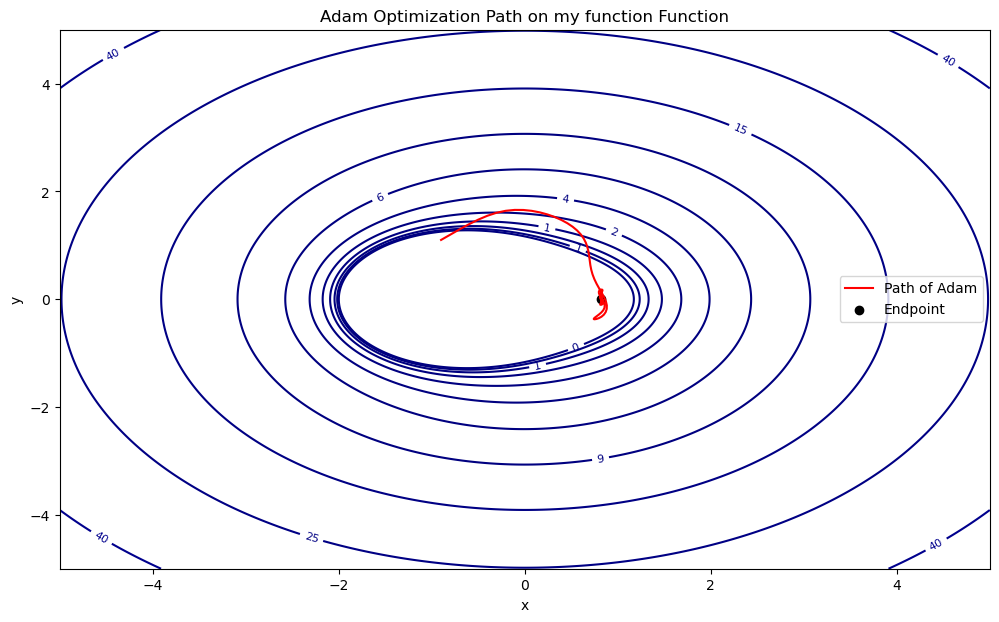

Initial position: ( -1 , 1 )
Optimized position: ( 0.8226312867775829 , 0.003920060151341892 )
Minimum value of f(x, y): -0.6530834747690042


In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function and its gradient
def my_function(x, y, a=1, b=10, c=1, d=1):
    return x**2 + y**2 - a * np.exp(-((x-1)**2 + y**2) / c) - b * np.exp(-((x+1)**2 + y**2) / d)

def der_my_function(x, y,  a=1, b=10, c=1, d=1):
    df_dx = 2*x + 2*a*(x-1)*np.exp(-((x-1)**2 + y**2) / c) - 2*b*(x+1)*np.exp(-((x+1)**2 + y**2) / d)
    df_dy = 2*y + 2*a*y*np.exp(-((x-1)**2 + y**2) / c) - 2*b*y*np.exp(-((x+1)**2 + y**2) / d)
    return np.array([df_dx, df_dy])

# Adam optimizer for a function with two variables
def adam_optimizer_2d(initial_x, initial_y, df, alpha=0.1, beta1=0.9, beta2=0.9, epsilon=1e-8, num_iterations=10000):
    x = initial_x
    y = initial_y
    m = np.zeros(2)
    v = np.zeros(2)
    t = 0

    x_history = []
    y_history = []

    for _ in range(num_iterations):
        t += 1
        grad = df(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad**2)
        
        mt = m / (1 - beta1**t)
        vt = v / (1 - beta2**t)
        
        x -= alpha * mt[0] / (np.sqrt(vt[0]) + epsilon)
        y -= alpha * mt[1] / (np.sqrt(vt[1]) + epsilon)
        
        x_history.append(x)
        y_history.append(y)
    
    return (x, y), x_history, y_history

# Starting point for the optimization
initial_x, initial_y = -1,1

# Running the optimizer
(final_x, final_y), x_history, y_history = adam_optimizer_2d(initial_x, initial_y, der_my_function, num_iterations=10000)

# Generating the contour plot of the Rosenbrock function
X, Y = np.meshgrid(np.linspace(-5, 5, 400), np.linspace(-5, 5, 400))
Z = my_function(X, Y)

levels = np.linspace(Z.min(), Z.max(), 20)
plt.figure(figsize=(12, 7))
contours = plt.contour(X, Y, Z, levels=levels, cmap='jet')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(x_history, y_history, 'r-', label='Path of Adam')
plt.scatter(x_history[-1], y_history[-1], c='black', label='Endpoint')
plt.title('Adam Optimization Path on my function Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Initial position: (", initial_x, ",", initial_y, ")")
print("Optimized position: (", final_x, ",", final_y, ")")
print("Minimum value of f(x, y):", my_function(final_x, final_y))